# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import json
import requests


from scipy.stats import linregress
#pip install citipy
# Import API key   

from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

#cities


In [3]:
len(cities)


593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#  https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

#url = "http://api.openweathermap.org/data/2.5/weather?"
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#for city in cities:
# Build query URL
query_url = url + "appid=" + weather_api_key + "&units=" + units +  "&q=" + city

#query_url

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
#print(f"The weather API responded with: {weather_json}.")

y = json.dumps(weather_json, indent=4, separators=(". ", " = "))
print(y)


{
    "coord" = {
        "lon" = -70.4833. 
        "lat" = -25.4
    }. 
    "weather" = [
        {
            "id" = 801. 
            "main" = "Clouds". 
            "description" = "few clouds". 
            "icon" = "02d"
        }
    ]. 
    "base" = "stations". 
    "main" = {
        "temp" = 63.72. 
        "feels_like" = 63.41. 
        "temp_min" = 63.72. 
        "temp_max" = 63.72. 
        "pressure" = 1013. 
        "humidity" = 77. 
        "sea_level" = 1013. 
        "grnd_level" = 1012
    }. 
    "visibility" = 10000. 
    "wind" = {
        "speed" = 6.46. 
        "deg" = 234. 
        "gust" = 5.99
    }. 
    "clouds" = {
        "all" = 24
    }. 
    "dt" = 1651352929. 
    "sys" = {
        "country" = "CL". 
        "sunrise" = 1651316645. 
        "sunset" = 1651356840
    }. 
    "timezone" = -14400. 
    "id" = 3870243. 
    "name" = "Taltal". 
    "cod" = 200
}


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#for city in cities:
# Build query URL
query_url = url + "appid=" + weather_api_key + "&units=" + units +  "&q=" 


city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#set a counter
index_counter = 0
set_counter = 1


print("start Data Retrieval")
print("-"*10)

for index, city in enumerate (cities):
    
        response = requests.get(query_url + city).json()
        try:
            city_name.append(response['name'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            
            if index_counter > 49:
                index_counter = 0
                set_counter = set_counter + 1
    
            else:
                index_counter = index_counter + 1
            
                print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
        except(KeyError, IndexError):
            print("City not found...")

print("-"*10)
print("Data Retrieval Complete")
print("-"*10)
            


start Data Retrieval
----------
Processing Record 1 of Set 1 : karrapur
Processing Record 2 of Set 1 : severo-kurilsk
Processing Record 3 of Set 1 : ushuaia
City not found...
City not found...
Processing Record 4 of Set 1 : new norfolk
Processing Record 5 of Set 1 : rikitea
Processing Record 6 of Set 1 : arraial do cabo
Processing Record 7 of Set 1 : georgetown
Processing Record 8 of Set 1 : busselton
Processing Record 9 of Set 1 : mataura
Processing Record 10 of Set 1 : port alfred
Processing Record 11 of Set 1 : porto novo
Processing Record 12 of Set 1 : tornio
City not found...
Processing Record 13 of Set 1 : port-gentil
Processing Record 14 of Set 1 : mutoko
Processing Record 15 of Set 1 : ancud
City not found...
Processing Record 16 of Set 1 : ponta delgada
Processing Record 17 of Set 1 : yulara
Processing Record 18 of Set 1 : kodiak
Processing Record 19 of Set 1 : egvekinot
Processing Record 20 of Set 1 : bluff
Processing Record 21 of Set 1 : saldanha
Processing Record 22 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_weather = pd.DataFrame({'City': city_name,
                             'Lat' : lat,
                             'Lng': lng,
                             'Max Temp': max_temp,
                             'Humidity': humidity, 
                             'Cloudiness': cloudiness,
                             'Wind Speed': wind_speed,
                             'Country': country,
                             'Date': date
                            })
city_weather.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Karrāpur,23.9500,78.8500,87.49,20,17,9.93,IN,1651352930
1,Severo-Kuril'sk,50.6789,156.1250,35.17,79,100,9.53,RU,1651352930
2,Ushuaia,-54.8000,-68.3000,40.66,75,0,0.00,AR,1651352864
3,New Norfolk,-42.7826,147.0587,56.91,69,100,7.00,AU,1651352931
4,Rikitea,-23.1203,-134.9692,76.03,75,52,10.67,PF,1651352932


In [7]:
city_weather.to_csv("Output_data/cities.csv")

In [8]:
city_weather.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,5.340000e+02
mean,18.903735,22.206701,60.545993,70.985019,58.992509,7.558914,1.651353e+09
std,33.902113,89.046537,19.259791,21.392424,39.240968,5.275483,1.075873e+02
min,-54.800000,-179.166700,1.890000,6.000000,0.000000,0.000000,1.651353e+09
25%,-9.351500,-54.094675,49.420000,61.000000,20.000000,3.530000,1.651353e+09
50%,22.258150,25.643400,62.455000,77.000000,72.000000,6.520000,1.651353e+09
75%,47.816675,102.264975,76.780000,87.000000,100.000000,10.360000,1.651353e+09
max,78.218600,179.316700,94.750000,100.000000,100.000000,33.380000,1.651353e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.

#--------------------humidity max is 100----------------------

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

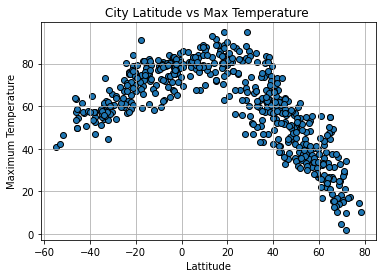

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], edgecolors = "black")
plt.xlabel("Lattitude")
plt.ylabel("Maximum Temperature")
plt.title("City Latitude vs Max Temperature ")
plt.grid()
plt.show()

plt.savefig("Images/City_Latitude_vs_Temp.png")

## Latitude vs. Humidity Plot

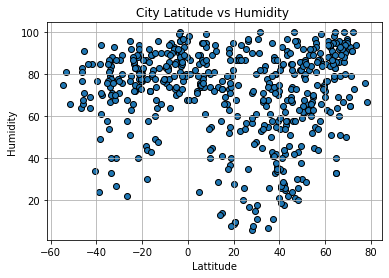

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(city_weather["Lat"], city_weather["Humidity"], edgecolors = "black")
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity ")
plt.grid()
plt.show()

plt.savefig("Images/City_Latitude_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

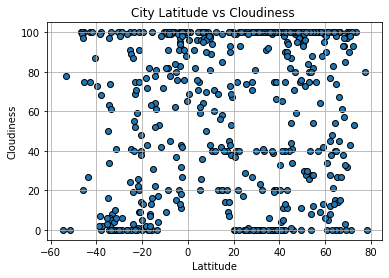

<Figure size 432x288 with 0 Axes>

In [13]:
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], edgecolors = "black")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness ")
plt.grid()
plt.show()

plt.savefig("Images/City_Latitude_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

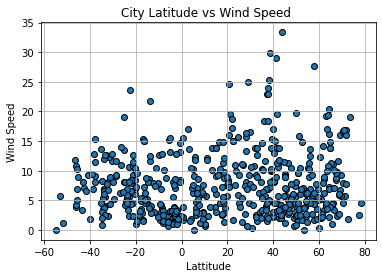

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(city_weather["Lat"], city_weather["Wind Speed"], edgecolors = "black")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed ")
plt.grid()
plt.show()

plt.savefig("Images/City_Latitude_vs_Wind_speed.png")

## Linear Regression

In [15]:
northern_hemisphere = city_weather.loc[city_weather["Lat"]>0]
southern_hemisphere= city_weather.loc[city_weather["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

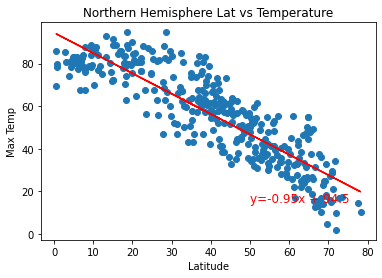

The rvalue is: -0.8756319323707835


<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere Lat vs Temperature")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(50,15),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/north_hemis_vs_temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

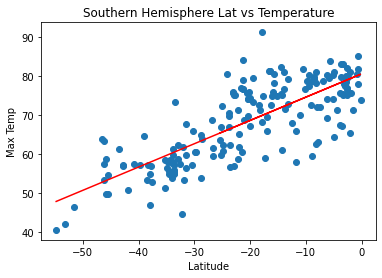

The rvalue is: 0.7822697651197441


<Figure size 432x288 with 0 Axes>

In [17]:
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere Lat vs Temperature")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(-20,15),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/south_hemis_vs_temp.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

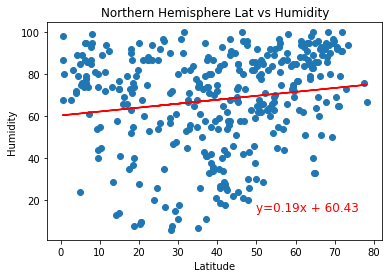

The rvalue is: 0.1573237803314147


<Figure size 432x288 with 0 Axes>

In [18]:
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Lat vs Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(50,15),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/north_hemis_vs_northern_hemisphere.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

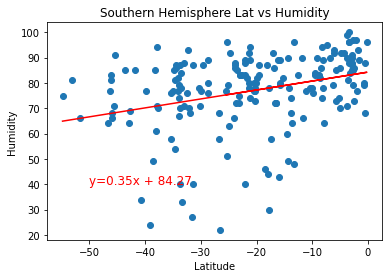

The rvalue is: 0.3165335519901957


<Figure size 432x288 with 0 Axes>

In [19]:
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Lat vs Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-50,40),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/south_hemis_vs_southern_hemisphere.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

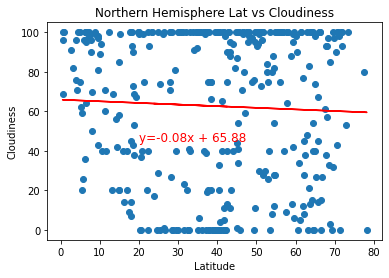

The rvalue is: -0.042123144048439774


<Figure size 432x288 with 0 Axes>

In [22]:
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Lat vs Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (20,45),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/north_hemis_vs_cloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

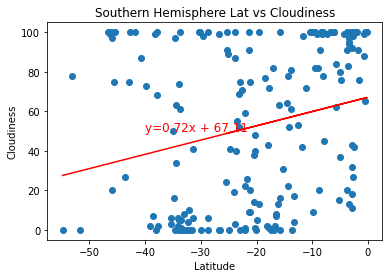

The rvalue is: 0.24505896940175942


<Figure size 432x288 with 0 Axes>

In [23]:
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere Lat vs Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-40,50),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/south_hemis_vs_cloud.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

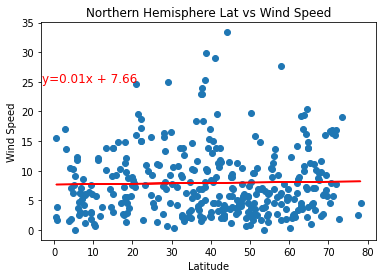

The rvalue is: 0.023880791000195845


<Figure size 432x288 with 0 Axes>

In [24]:
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere Lat vs Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-3,25),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/north_hemis_vs_wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

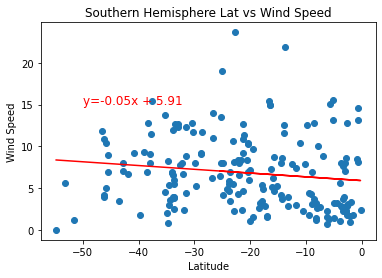

The rvalue is: -0.14072381854496444


<Figure size 432x288 with 0 Axes>

In [25]:
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere Lat vs Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-50,15),fontsize=12,color="red")
plt.show()
print (f"The rvalue is: {rvalue}")

plt.savefig("Images/south_hemis_vs_wind.png")